In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Define dataset path
dataset_zip = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/dataset"

# Extract dataset
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import zipfile

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/dataset"  # Extracted dataset path

# Extract ZIP file (Only if not already extracted)
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

# Define Real and Fake Video Paths (after extraction)
real_videos = os.path.join(extract_path, "FF++", "real")
fake_videos = os.path.join(extract_path, "FF++", "fake")

# Check if directories exist
if not os.path.isdir(real_videos) or not os.path.isdir(fake_videos):
    raise Exception("Error: Check if 'real' and 'fake' folders exist in the extracted dataset.")

# Define constants
IMG_SIZE = 224  # Input image size
FRAME_COUNT = 5  # Number of frames to extract per video

# Function to extract frames from videos
def extract_frames(video_path, frame_count=FRAME_COUNT):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(frame_count):
        frame_id = int((i / frame_count) * total_frames)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)

    cap.release()
    return np.array(frames)

X, y = [], []

# Process Real Videos
for video in os.listdir(real_videos):
    video_path = os.path.join(real_videos, video)
    if os.path.isfile(video_path):  # Check if it's a valid file
        frames = extract_frames(video_path)
        if len(frames) == FRAME_COUNT:
            X.extend(frames)  # Store frames
            y.extend([0] * FRAME_COUNT)  # Label real videos as 0

# Process Fake Videos
for video in os.listdir(fake_videos):
    video_path = os.path.join(fake_videos, video)
    if os.path.isfile(video_path):  # Check if it's a valid file
        frames = extract_frames(video_path)
        if len(frames) == FRAME_COUNT:
            X.extend(frames)
            y.extend([1] * FRAME_COUNT)  # Label fake videos as 1

# Convert to NumPy arrays
X = np.array(X) / 255.0  # Normalize images
y = to_categorical(y, 2)  # Convert labels to one-hot encoding

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset Loaded: {X_train.shape}, {y_train.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully!
Dataset Loaded: (1600, 224, 224, 3), (1600, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.5130 - loss: 0.7131 - val_accuracy: 0.5400 - val_loss: 0.6881
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 0.5974 - loss: 0.6809 - val_accuracy: 0.6625 - val_loss: 0.6684
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.6411 - loss: 0.6536 - val_accuracy: 0.6450 - val_loss: 0.6513
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.6776 - loss: 0.6166 - val_accuracy: 0.6800 - val_loss: 0.6225
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.7400 - loss: 0.5685 - val_accuracy: 0.7000 - val_loss: 0.6082
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.7413 - loss: 0.5456 - val_accuracy: 0.7100 - val_loss: 0.6013
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7436 - loss: 0.5492 - val_accuracy: 0.6950 - val_loss: 0.6093
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.7594 - loss: 0.5100 - val_accuracy: 0.6825 - v

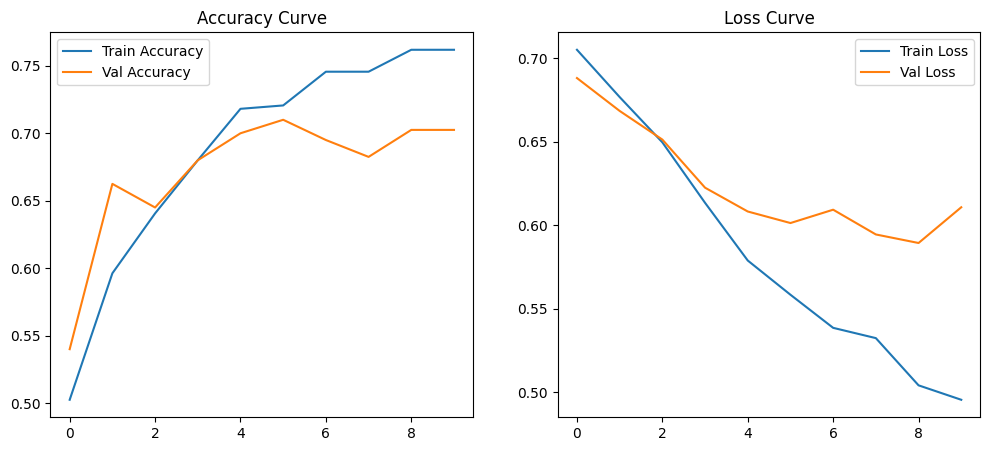

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(2, activation='softmax')  # 2 classes: Real(0) & Fake(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate model performance
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()


In [ ]:
model.save("/content/drive/MyDrive/model.h5")  # Saves the trained model
print("✅ Model saved successfully in Google Drive!")


✅ Model saved successfully in Google Drive!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Load Your Trained Model
MODEL_PATH = "/content/drive/MyDrive/model.h5"  # Update this with your actual model path
model = load_model(MODEL_PATH)
print("✅ Model Loaded Successfully!")

# ✅ Constants
FRAME_COUNT = 5  # Number of frames to extract per video
IMG_SIZE = 224   # Input image size for CNN model

def extract_frames(video_path, frame_count=FRAME_COUNT):
    """ Extract frames from a video at evenly spaced intervals. """
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(frame_count):
        frame_id = int((i / frame_count) * total_frames)  # Select frames at equal intervals
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))  # Resize to match model input
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)   # Convert BGR to RGB
            frames.append(frame)

    cap.release()

    if len(frames) < frame_count:
        return None  # Return None if frames are insufficient

    return np.array(frames) / 255.0  # Normalize frames

def predict_video(video_path, model):
    """ Predict whether a video is REAL or FAKE using the trained model. """
    frames = extract_frames(video_path)

    if frames is None:
        return "⚠️ Prediction Failed: Not enough frames extracted"

    predictions = model.predict(frames)  # Predict on each frame
    avg_prediction = np.mean(predictions, axis=0)  # Average predictions

    final_class = np.argmax(avg_prediction)  # 0 = Real, 1 = Fake
    confidence = max(avg_prediction) * 100  # Confidence score

    return f"🎯 Predicted: {'FAKE' if final_class == 1 else 'REAL'} (Confidence: {confidence:.2f}%)"

# ✅ Run Prediction on a Test Video
video_path = "//content/drive/MyDrive/ai_fake.mp4"  # Update this with your test video path
if os.path.exists(video_path):
    result = predict_video(video_path, model)
    print(result)
else:
    print(f"⚠️ Error: Video file not found at {video_path}")


✅ Model Loaded Successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
🎯 Predicted: FAKE (Confidence: 54.43%)
